# Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression

In [2]:
fruits = pd.read_table("fruit_data_with_colors.txt")
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [3]:
X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

In [4]:
# making the problem into apples vs not apples
y_fruits_apple = y_fruits_2d == 1

### Train - Test Split

In [5]:
X_train, X_test, y_train, y_test = (train_test_split(X_fruits_2d.values, y_fruits_apple.values, random_state = 0))

In [6]:
temp = pd.DataFrame(X_train)
temp.columns = ['height', 'weight']
temp['apple?'] = y_train
temp.head()

,height,weight,apple?
0,7.2,7.2,False
1,10.1,7.3,False
2,4.0,5.8,False
3,7.3,7.6,True
4,7.0,7.2,False


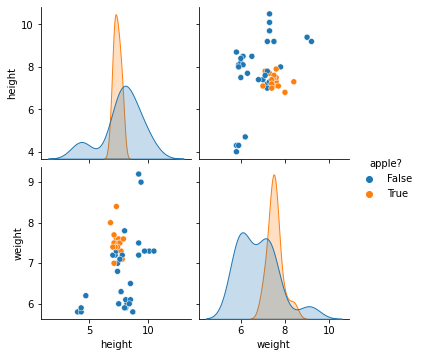

In [7]:
sns.pairplot(data = temp, hue = "apple?")

## Logistic Regression

In [8]:
clf = LogisticRegression().fit(X_train, y_train)

y_pred = clf.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[10,  1],
       [ 4,  0]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

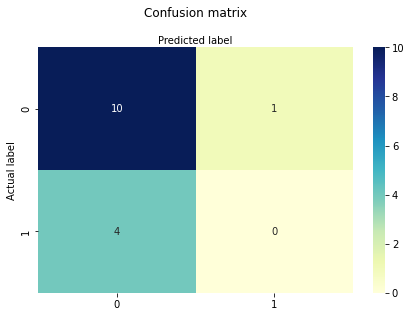

In [9]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [10]:
target_names = ['True', 'False']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

        True       0.71      0.91      0.80        11
       False       0.00      0.00      0.00         4

    accuracy                           0.67        15
   macro avg       0.36      0.45      0.40        15
weighted avg       0.52      0.67      0.59        15



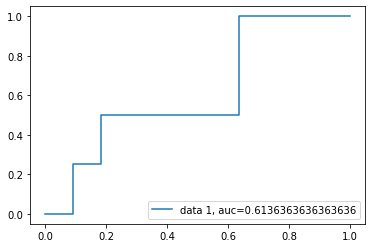

In [11]:
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()